In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import myLib as my

In [2]:
train = pd.read_csv("train2.csv")
test = pd.read_csv("test2.csv")

In [3]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

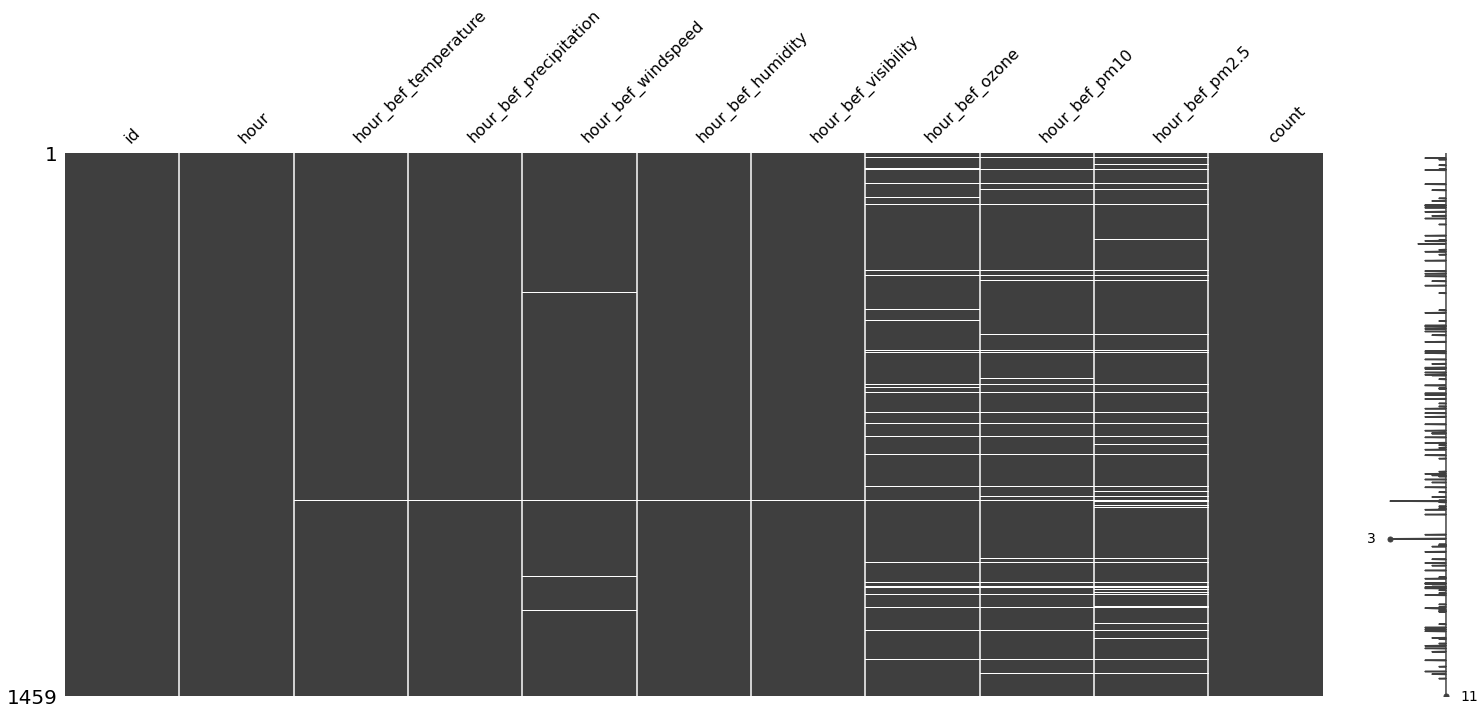

In [4]:
import missingno
missingno.matrix(train)
plt.show()

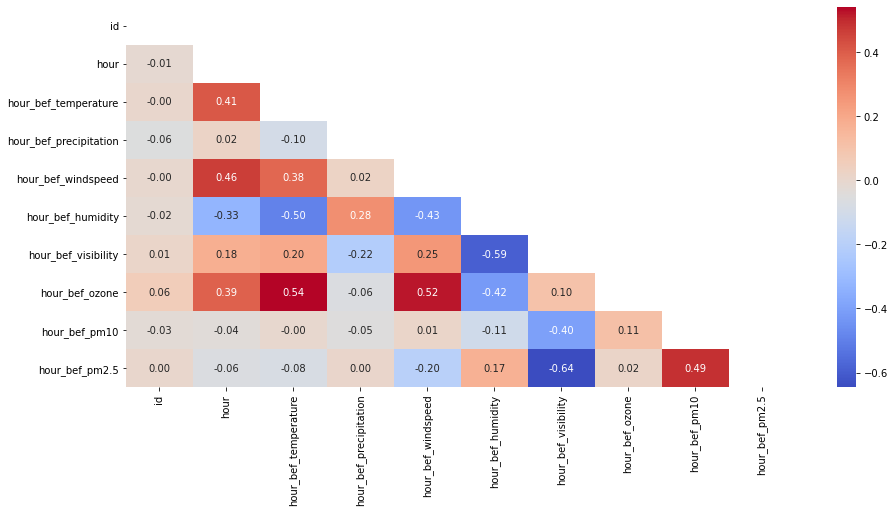

In [5]:
my.prettyCorr(train.drop(columns=['count']))

In [6]:
# sns.pairplot(train.drop(columns=['count']))

In [7]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [8]:
train.hour_bef_precipitation.unique()

array([ 1.,  0., nan])

In [9]:
train.hour_bef_precipitation.value_counts()

0.0    1411
1.0      46
Name: hour_bef_precipitation, dtype: int64

<AxesSubplot:xlabel='hour_bef_precipitation', ylabel='count'>

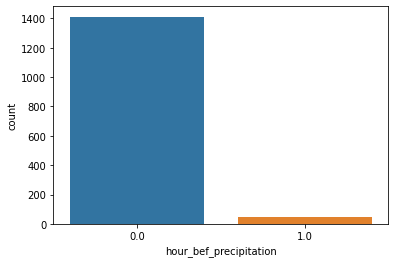

In [10]:
sns.countplot(data=train, x='hour_bef_precipitation')

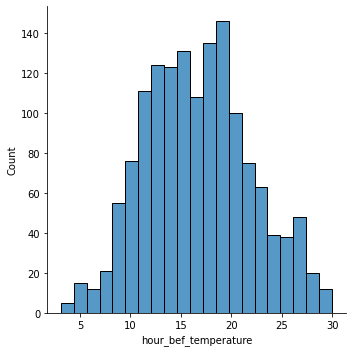

In [11]:
sns.displot(data=train, x='hour_bef_temperature')

In [12]:
# sns.rugplot(data=train, x='hour_bef_temperature', height=1)
# plt.show()

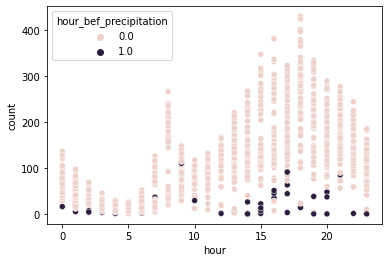

In [13]:
sns.scatterplot(data=train, x='hour', y='count', hue='hour_bef_precipitation')
plt.show()

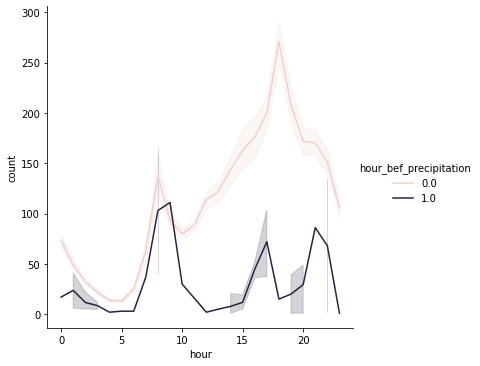

In [14]:
sns.relplot(data=train, x='hour', y='count', kind='line', hue='hour_bef_precipitation')
plt.show()

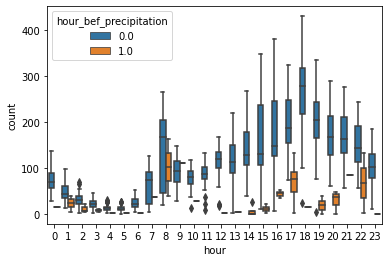

In [15]:
sns.boxplot(data=train, x='hour', y='count', hue='hour_bef_precipitation')
plt.show()

In [16]:
train.dropna(axis=0, inplace=True)

In [17]:
train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [18]:
high = train['count'].quantile(0.99)
low = train['count'].quantile(0.1)
train = train[(high > train['count']) & (low < train['count'])]

In [19]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
df_cont = train[[
    'hour_bef_temperature', 
    'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
    'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5',
]]

In [22]:
df_cont = pd.DataFrame(scaler.fit_transform(df_cont), index=df_cont.index, columns=df_cont.columns)

In [24]:
df_cat = train[['hour', 'hour_bef_precipitation']]
df_cat = pd.get_dummies(data=df_cat, columns=df_cat.columns)
df_cat

,hour_0,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_bef_precipitation_0.0,hour_bef_precipitation_1.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1455,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1456,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [25]:
x = pd.concat([df_cat, df_cont], axis=1)
y = train['count']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=123)

In [28]:
x_train = x_train.sort_index()
y_train = y_train.sort_index()
x_test = x_test.sort_index()
y_test = y_test.sort_index()

In [29]:
baseModel = LinearRegression().fit(x_train, y_train)

In [30]:
my.coef(baseModel.coef_, x_train)

,coef,columns
0,-359901113579407.94,hour_0
1,-359901113579440.44,hour_2
2,-359901113579444.81,hour_3
3,-359901113579448.06,hour_4
4,-359901113579463.69,hour_5
5,-359901113579439.06,hour_6
6,-359901113579391.19,hour_7
7,-359901113579316.06,hour_8
8,-359901113579375.50,hour_9
9,-359901113579402.81,hour_10


In [31]:
yhat = baseModel.predict(x_train)
my.adjustedR2(x_train, y_train, yhat)
yhat = baseModel.predict(x_test)
my.adjustedR2(x_test, y_test, yhat)

{'r2': 0.6653111655999099, 'adjustedR2': 0.6120273710685522}

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, KFold

In [34]:
folds = KFold(n_splits=10, shuffle=True)

In [35]:
elasticModel = ElasticNet()
params = {
    'l1_ratio': [0, 0.3, 0.5, 0.8, 1],
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}
search = GridSearchCV(elasticModel, param_grid=params, cv=folds, scoring='r2')
search.fit(x_train, y_train)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 682262.7414088211, tolerance: 470.56607809523814
Objective did not converge. You might want to increase the number of iterations. Duality gap: 703062.2736299373, tolerance: 478.8141995238094
Objective did not converge. You might want to increase the number of iterations. Duality gap: 712311.8732959961, tolerance: 493.9718189285716
Objective did not converge. You might want to increase the number of iterations. Duality gap: 654870.5052859877, tolerance: 481.07103988095247
Objective did not converge. You might want to increase the number of iterations. Duality gap: 670443.2157723106, tolerance: 474.7316061831154
Objective did not converge. You might want to increase the number of iterations. Duality gap: 707417.4213437536, tolerance: 476.6378337693223
Objective did not converge. You might want to increase the number of iterations. Duality gap: 689588.2127259889, tolerance: 473.59958549346015
Obj

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.3, 0.5, 0.8, 1]},
             scoring='r2')

In [36]:
search.best_score_

0.7005986600938476

In [37]:
search.best_params_

{'alpha': 0.001, 'l1_ratio': 0.3}

In [38]:
search.best_estimator_

ElasticNet(alpha=0.001, l1_ratio=0.3)

In [39]:
best_model = search.best_estimator_

In [40]:
yhat = search.predict(x_test)
my.adjustedR2(x_test, y_test, yhat)

{'r2': 0.6668154202839838, 'adjustedR2': 0.613771109085414}

In [41]:
my.coef(best_model.coef_, x_train)

,coef,columns
0,-25.74,hour_0
1,-59.70,hour_2
2,-64.02,hour_3
3,-66.97,hour_4
4,-78.91,hour_5
5,-58.67,hour_6
6,-12.24,hour_7
7,62.74,hour_8
8,4.63,hour_9
9,-23.06,hour_10


In [42]:
from sklearn.svm import SVR

In [43]:
folds = KFold(n_splits=10, shuffle=True)

In [44]:
svmModel = SVR()
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1, 10, 100]
}
search = GridSearchCV(svmModel, param_grid=params, scoring='r2')
result = search.fit(x_train, y_train)
print(result.best_score_)
print(result.best_params_)

0.6952172174206102
{'C': 100, 'gamma': 0.1}


In [45]:
best_model = result.best_estimator_
yhat_test = best_model.predict(x_test)
test_score = my.adjustedR2(x_test, y_test, yhat_test)
print(test_score)

{'r2': 0.7211778470472084, 'adjustedR2': 0.6767882505572118}


In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
folds = KFold(n_splits=5, shuffle=True)

In [48]:
rfModel = RandomForestRegressor()

params = {
    'n_estimators': [10, 20],
    'max_depth': [3, 5, None],
    'criterion': ['mse', 'mae'],
    'max_features': ['auto'],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [1, 3]
}
search = GridSearchCV(rfModel, params, cv=folds, scoring='r2')
result = search.fit(x_train, y_train)

In [49]:
best_model = result.best_estimator_

In [53]:
yhat_train = best_model.predict(x_train)
print(my.adjustedR2(x_train, y_train, yhat_train))

yhat_test = best_model.predict(x_test)
print(my.adjustedR2(x_test, y_test, yhat_test))

{'r2': 0.9448749808992613, 'adjustedR2': 0.942917155581588}
{'r2': 0.6672339144272297, 'adjustedR2': 0.6142562291619129}


In [54]:
importance = best_model.feature_importances_
importance

array([0.00516836, 0.02525392, 0.02995004, 0.00850657, 0.00953955,
       0.01928706, 0.00271271, 0.02946867, 0.00619747, 0.00639548,
       0.00473692, 0.00367752, 0.00514504, 0.00948407, 0.00567949,
       0.00489738, 0.00739042, 0.03562012, 0.02382978, 0.00911184,
       0.02012939, 0.0221447 , 0.00422059, 0.00149588, 0.00117243,
       0.2360567 , 0.08560568, 0.0663016 , 0.09401004, 0.10444753,
       0.05768829, 0.05467478])

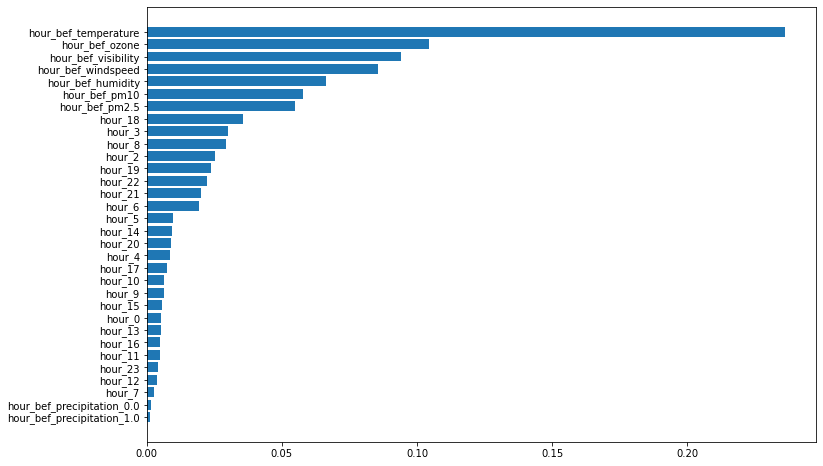

In [55]:
indices = np.argsort(importance)
plt.figure(figsize=(12, 8))
plt.barh(x_train.columns[indices], importance[indices], align='center')
plt.show()

In [64]:
np.argsort(importance)

array([24, 23,  6, 11, 22, 10, 15, 12,  0, 14,  8,  9, 16,  3, 19, 13,  4,
        5, 20, 21, 18,  1,  7,  2, 17, 31, 30, 27, 26, 28, 29, 25],
      dtype=int64)

In [71]:
import lightgbm as lgb

In [73]:
lgbModel = lgb.LGBMRegressor()

In [75]:
lgbModel.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [76]:
params = {
    'n_estimators': [10, 20],
    'num_leaves': [31, 62],
    'colsample_bytree': [0.1, 0.5, 1],
    'min_data_in_leaf': [1, 5]
}
search = GridSearchCV(lgbModel, param_grid = params, cv=folds, scoring='r2')

In [77]:
result = search.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is

In [78]:
result.best_score_

0.658934665271542

In [79]:
result.best_params_

{'colsample_bytree': 1,
 'min_data_in_leaf': 1,
 'n_estimators': 20,
 'num_leaves': 31}

In [80]:
model = result.best_estimator_
yhat_test = model.predict(x_test)

In [81]:
test_score = my.adjustedR2(x_test, y_test, yhat_test)

In [82]:
test_score

{'r2': 0.6843457254497238, 'adjustedR2': 0.6340923086058988}